In [1]:
from stats import *
import pandas as pd

In [2]:
x= pd.read_csv("labels/labels_7.csv")
x

,run,trial,global time,run time,morph level,couple,response,response time
0,1,1,875269,849,15,6,1,1065.0
1,1,2,881172,6752,95,4,1,1112.0
2,1,3,886074,11654,75,1,1,1481.0
3,1,4,889475,15055,5,6,0,NaN
4,1,5,893860,19440,45,2,0,NaN
...,...,...,...,...,...,...,...,...
367,4,88,3080626,451677,65,4,1,674.0
368,4,89,3086328,457379,75,6,1,827.0
369,4,90,3091630,462681,65,2,1,1159.0
370,4,91,3095931,466982,25,1,0,NaN


In [3]:
cur_mean, cur_std = compute_morph_scores(x)

print(cur_mean)
print(cur_std)

             response  response time
morph level                         
5            0.111111    2639.200000
15           0.085714    3149.000000
25           0.052632    3927.000000
35           0.064516    1485.000000
45           0.179487    2076.857143
55           0.658537    1544.444444
65           0.923077     927.000000
75           1.000000     921.875000
85           1.000000     823.315789
95           1.000000     934.794118
             response  response time
morph level                         
5            0.142134       5.008724
15           0.163984      18.729453
25           0.160014       9.175662
35           0.176587      11.962934
45           0.146944       7.034418
55           0.092394       4.010310
65           0.044992       1.057723
75           0.000000       3.559637
85           0.000000       2.728287
95           0.000000       3.877947


In [4]:
_, fitted_curve = fit_sigmoid(cur_mean)

inflexion_point = find_inflexion(fitted_curve)


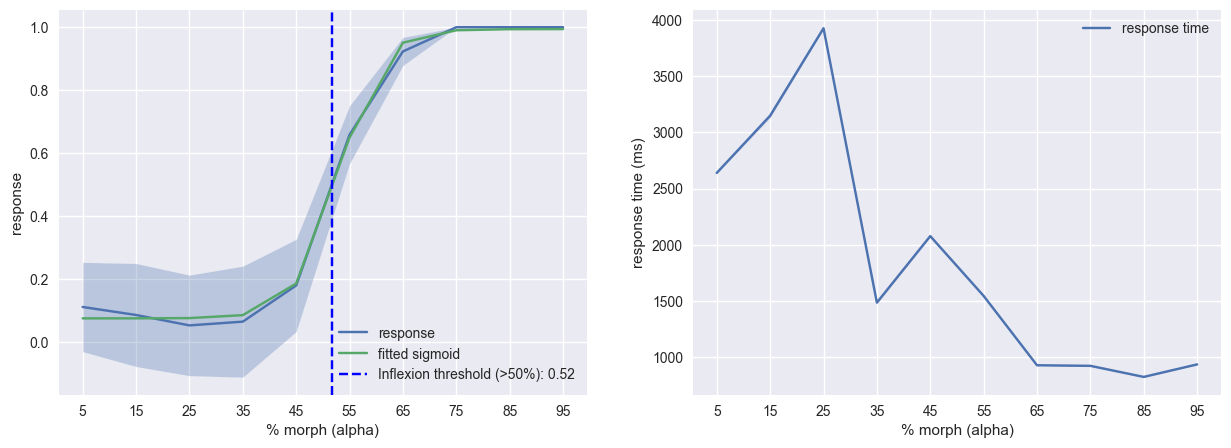

In [5]:

plot_behavioral_data(cur_mean, cur_std, sigmoid_curve=fitted_curve, inflexion_point=inflexion_point)


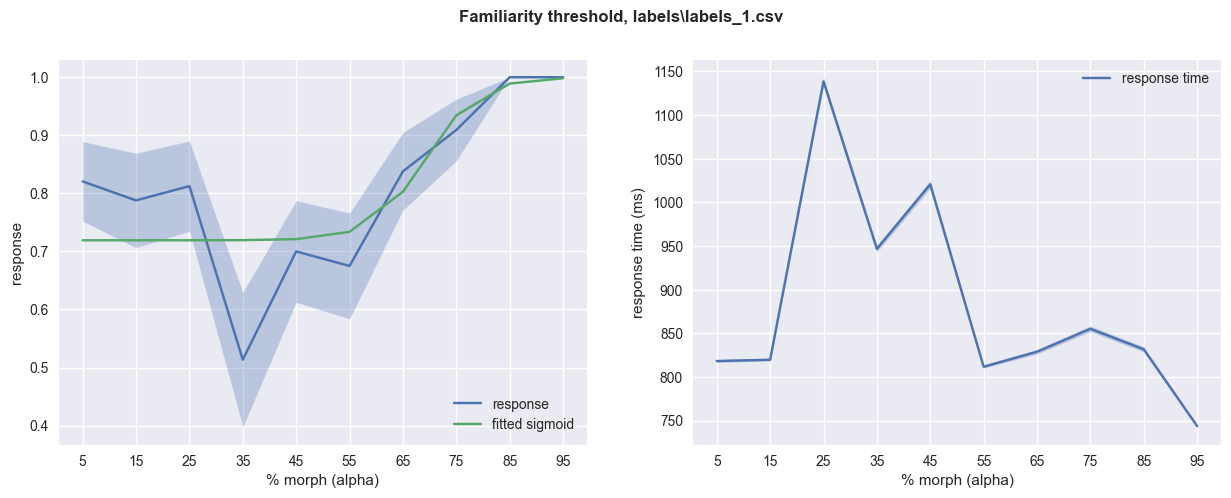

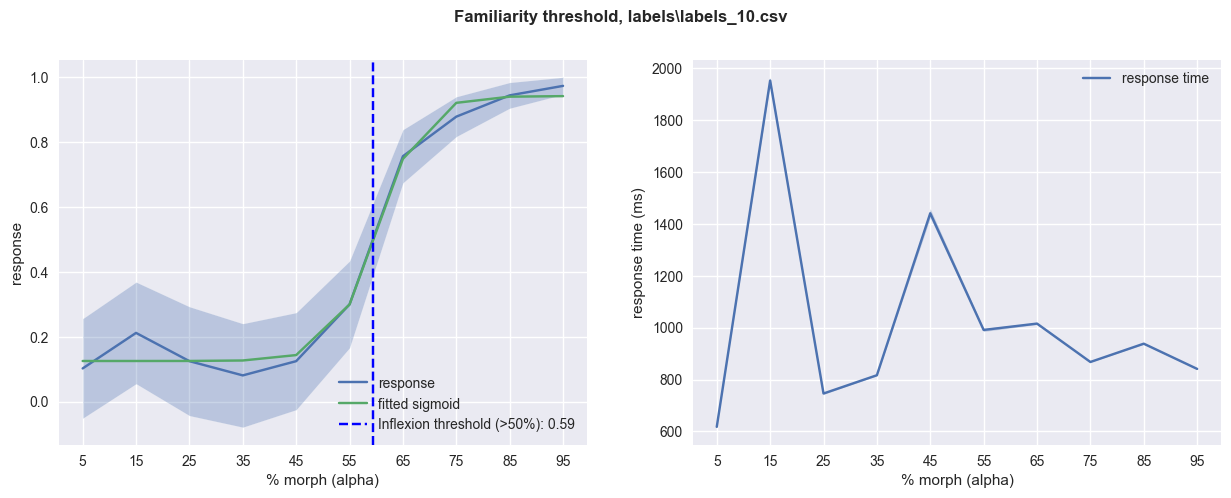

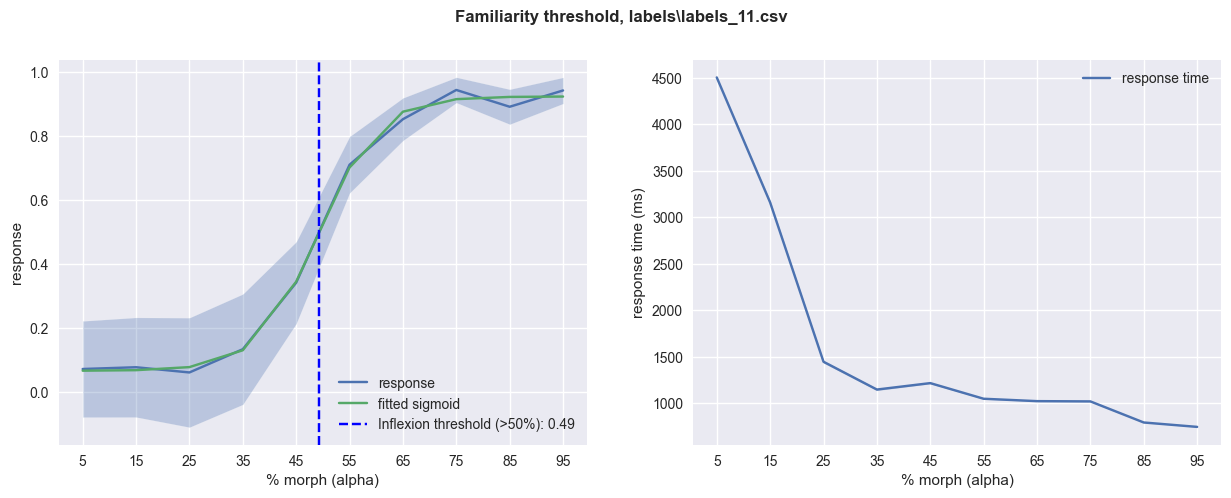

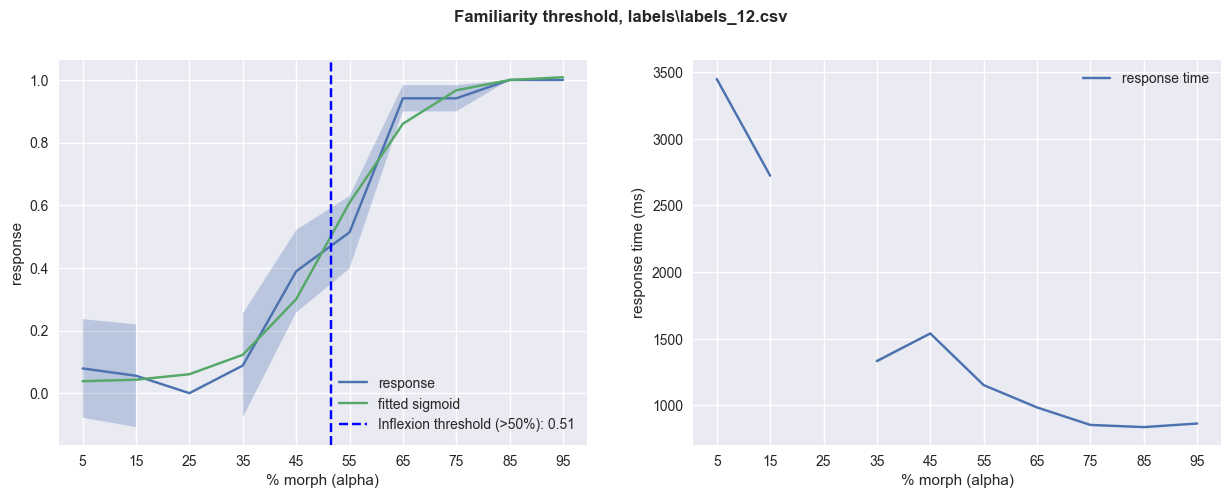

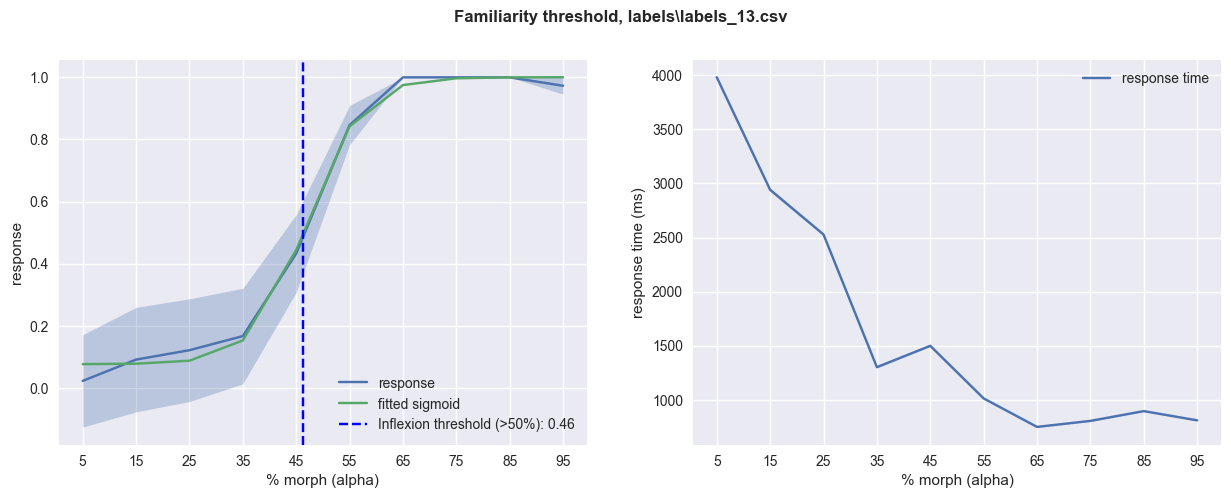

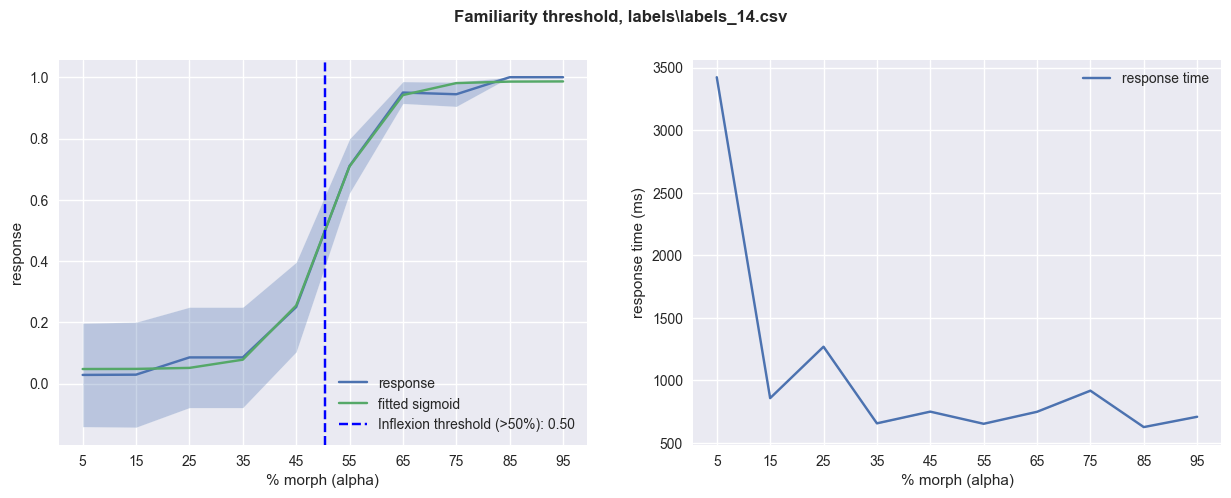

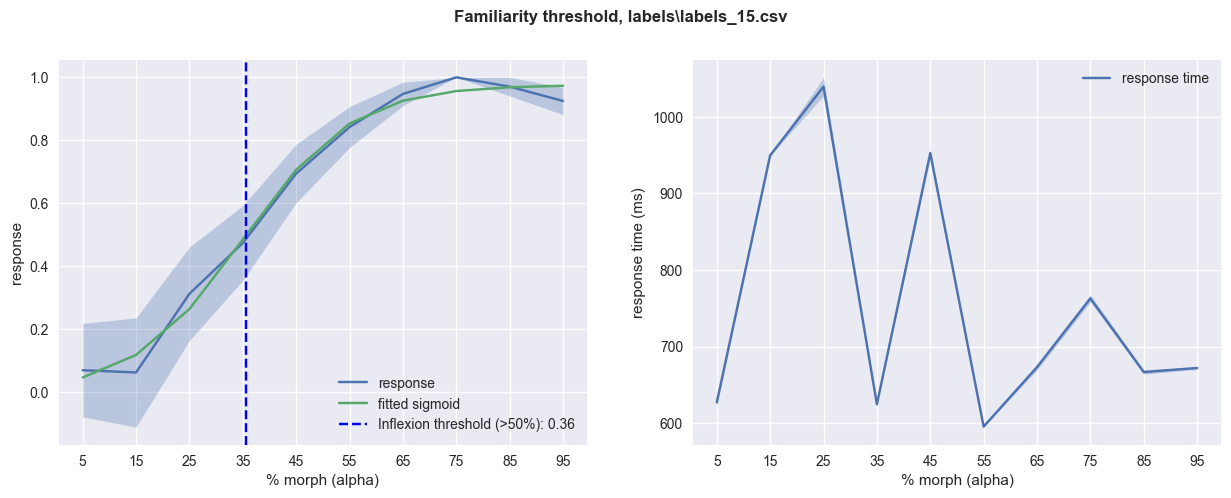

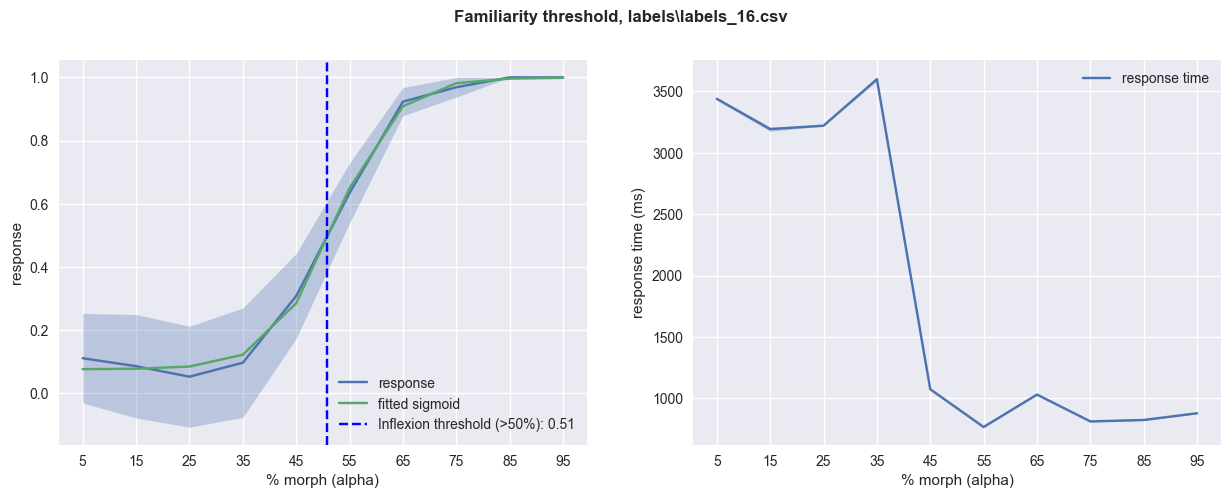

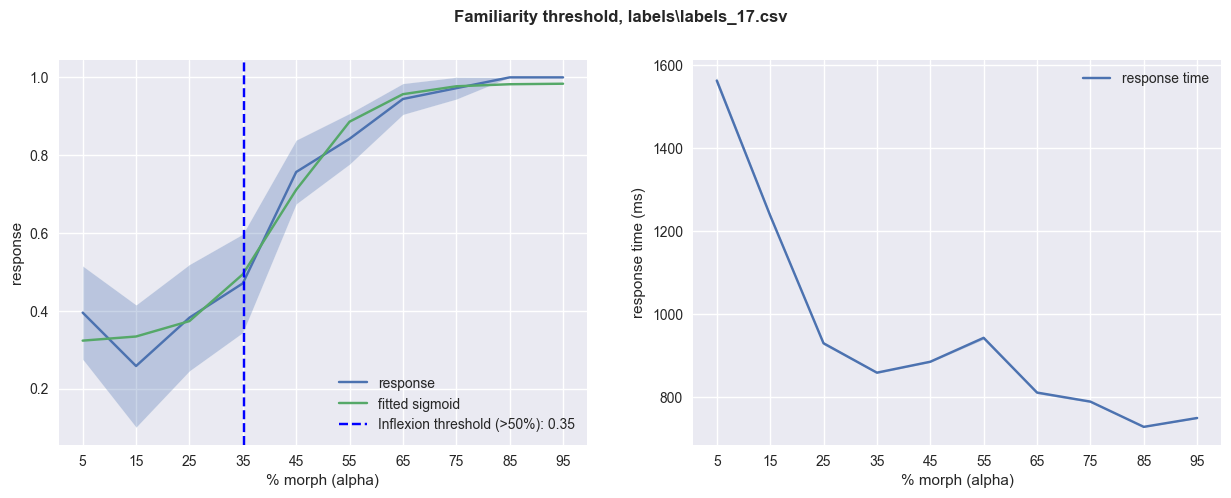

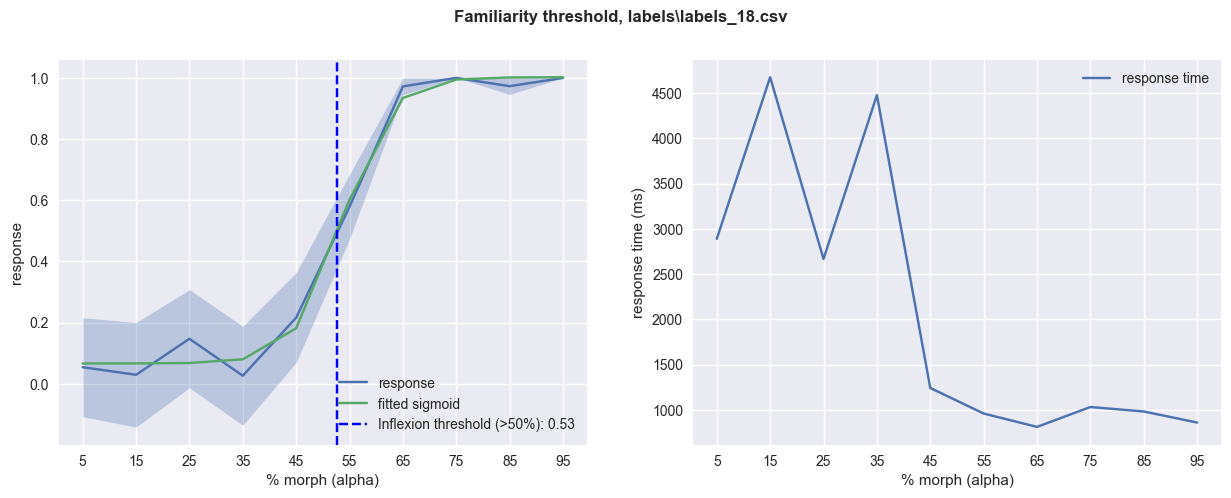

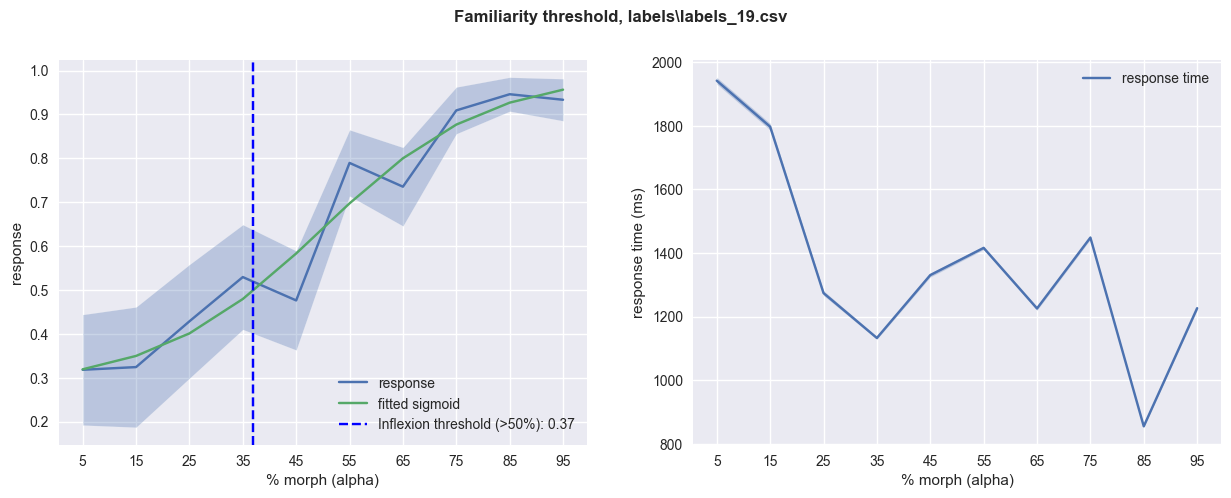

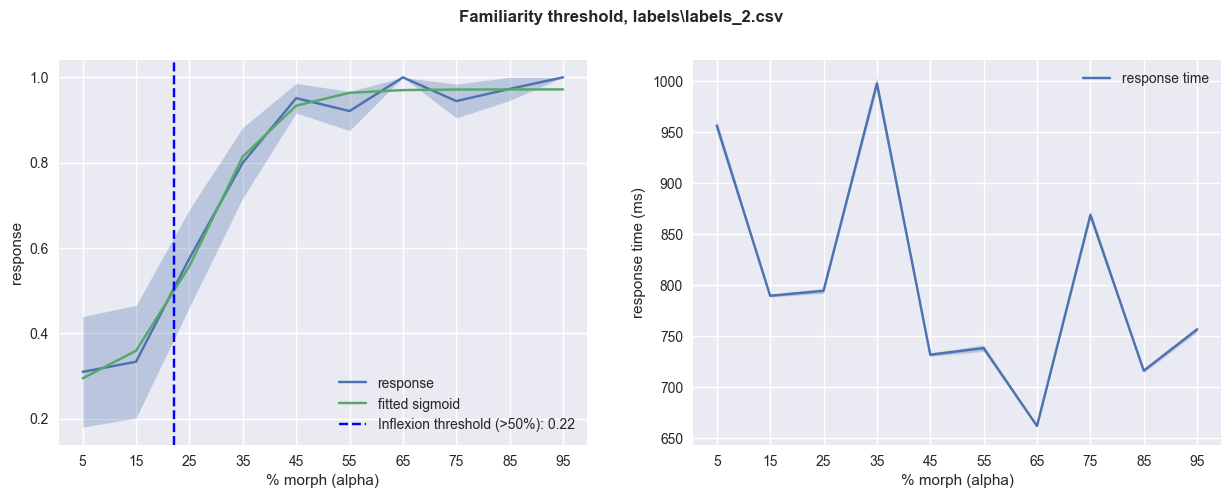

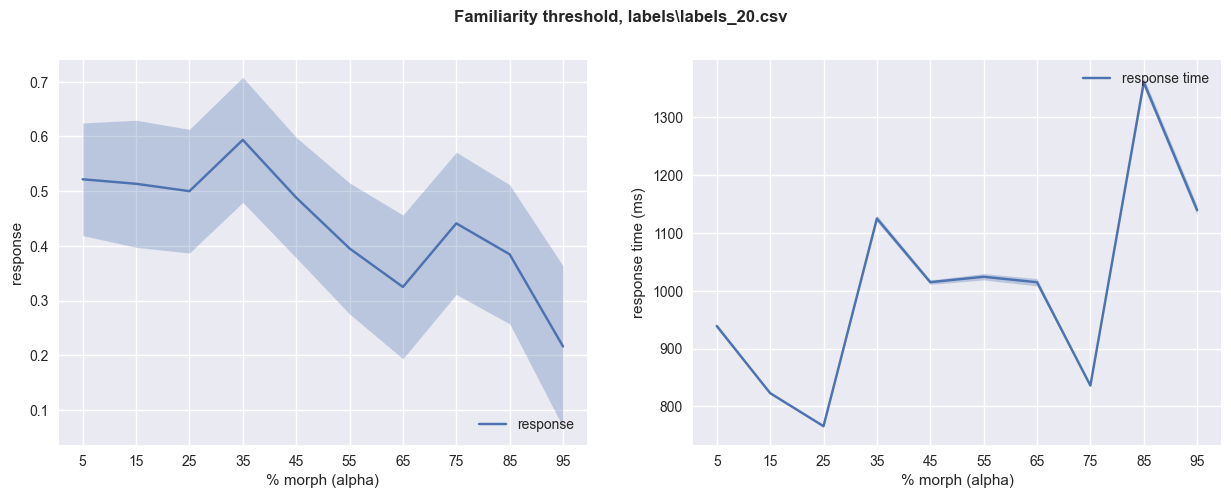

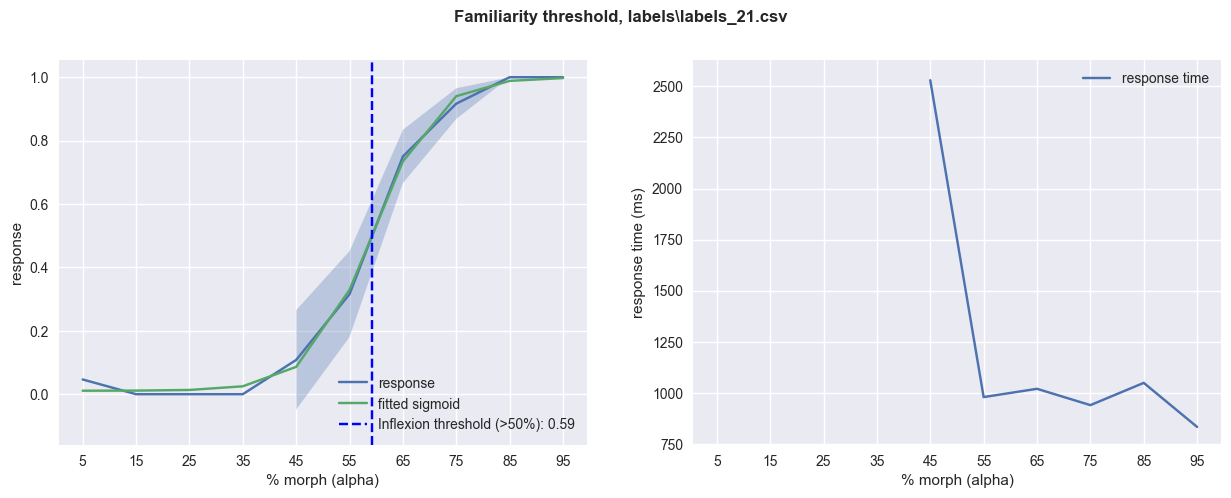

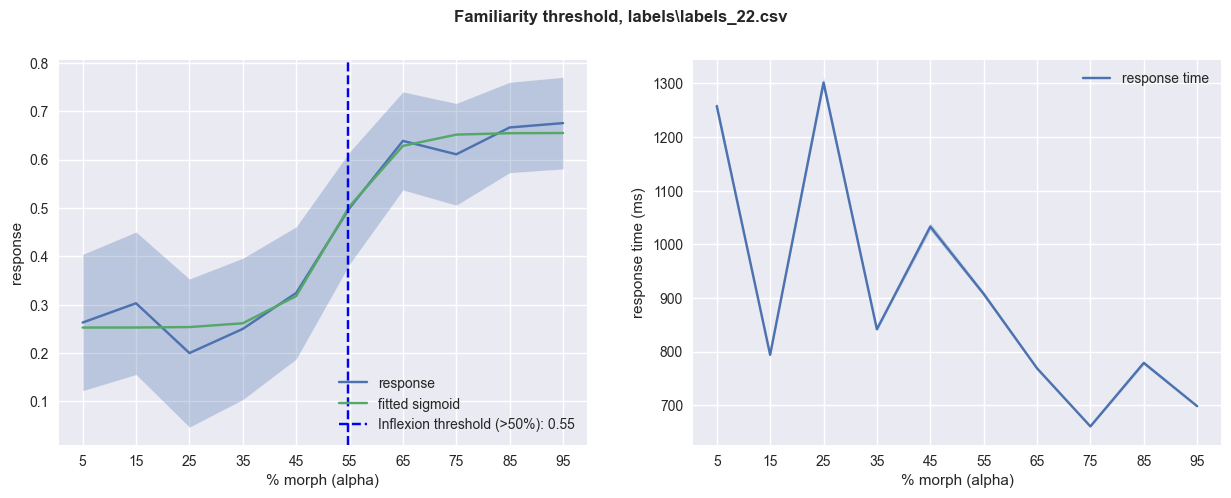

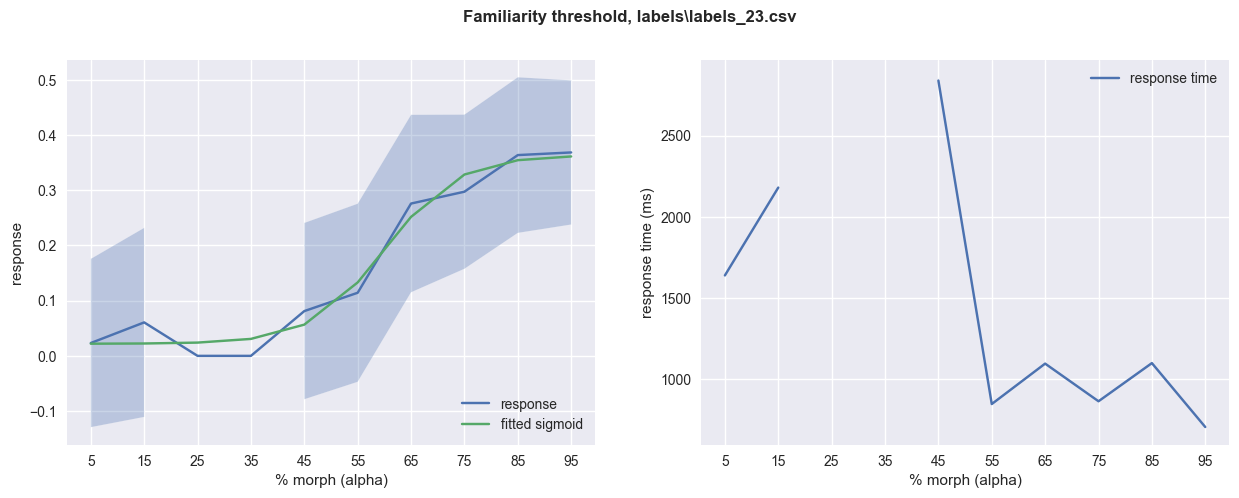

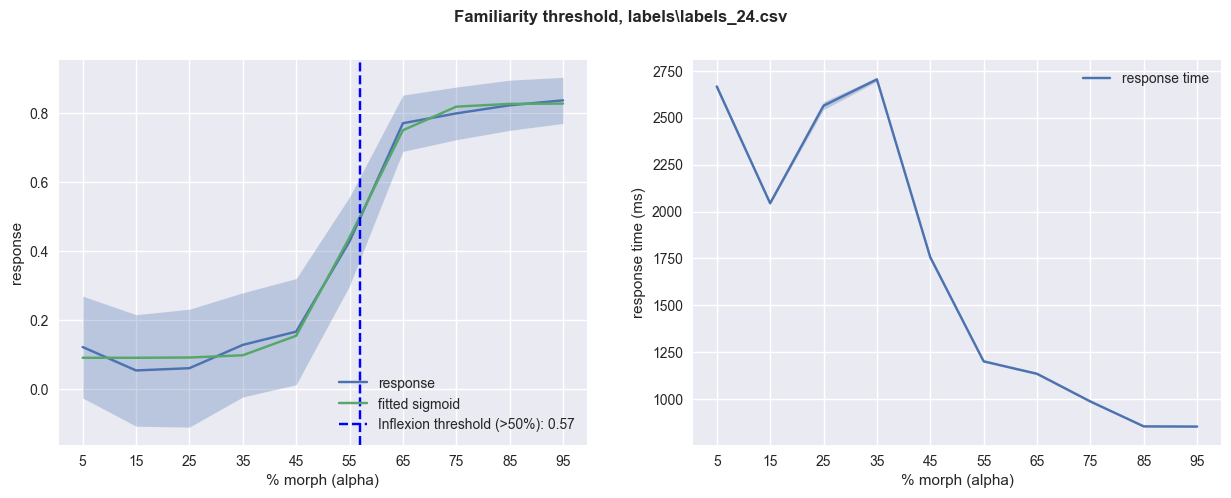

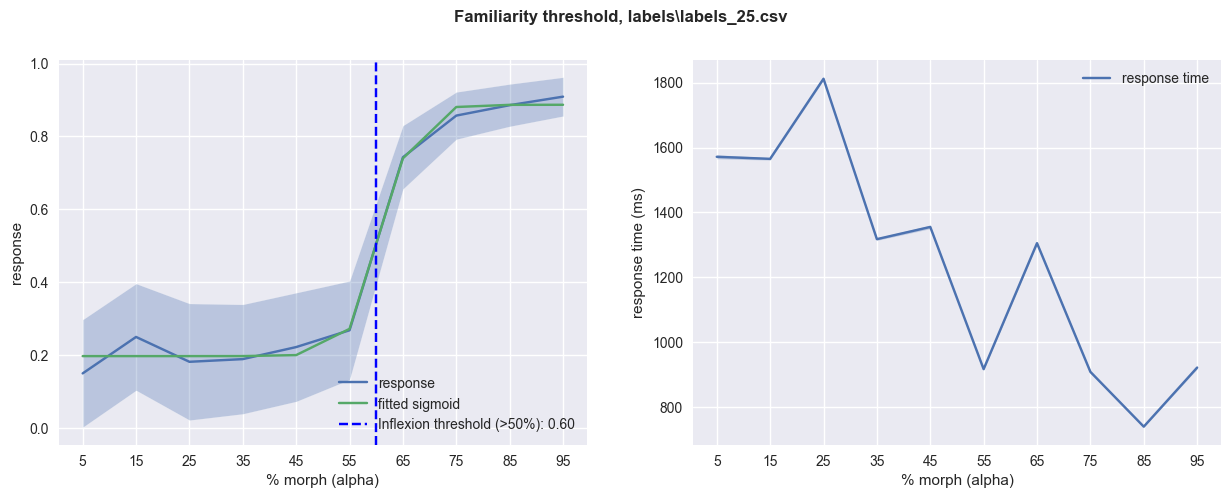

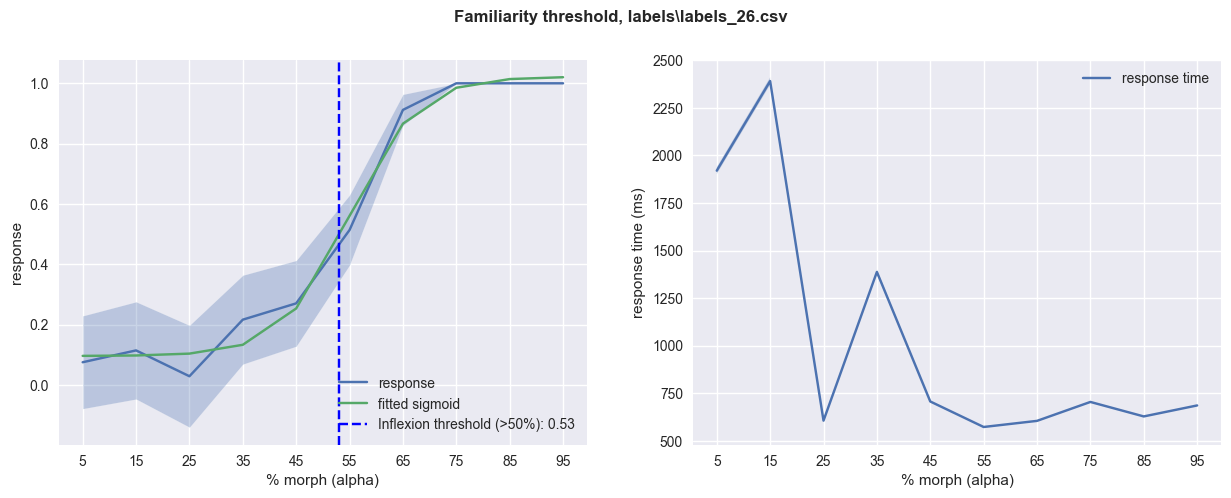

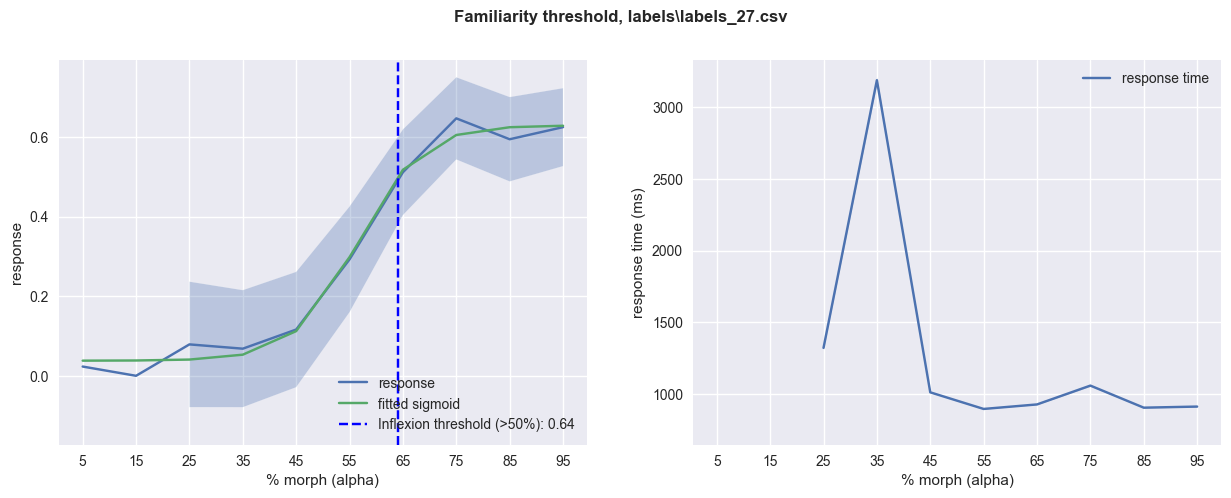

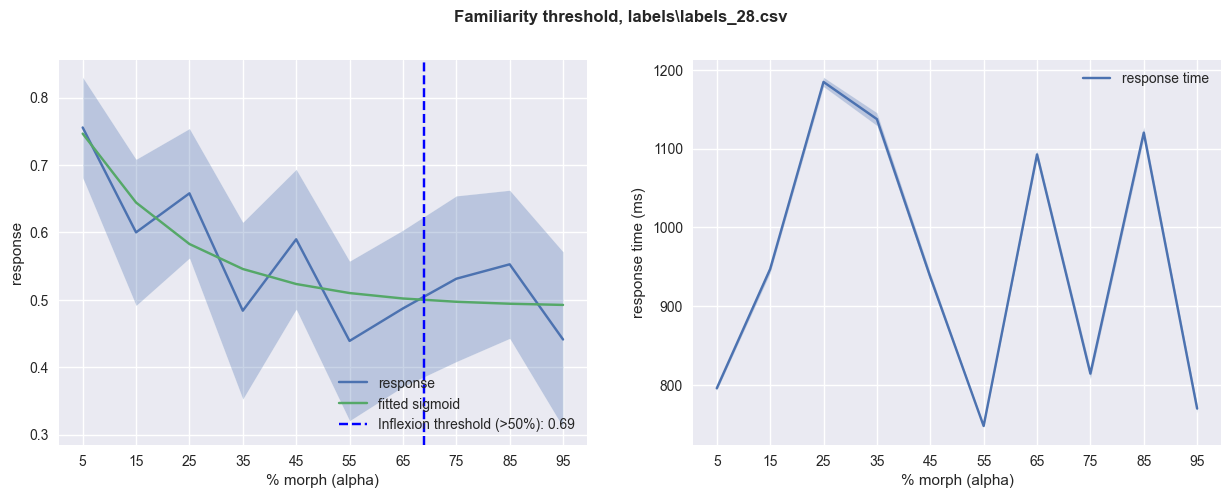

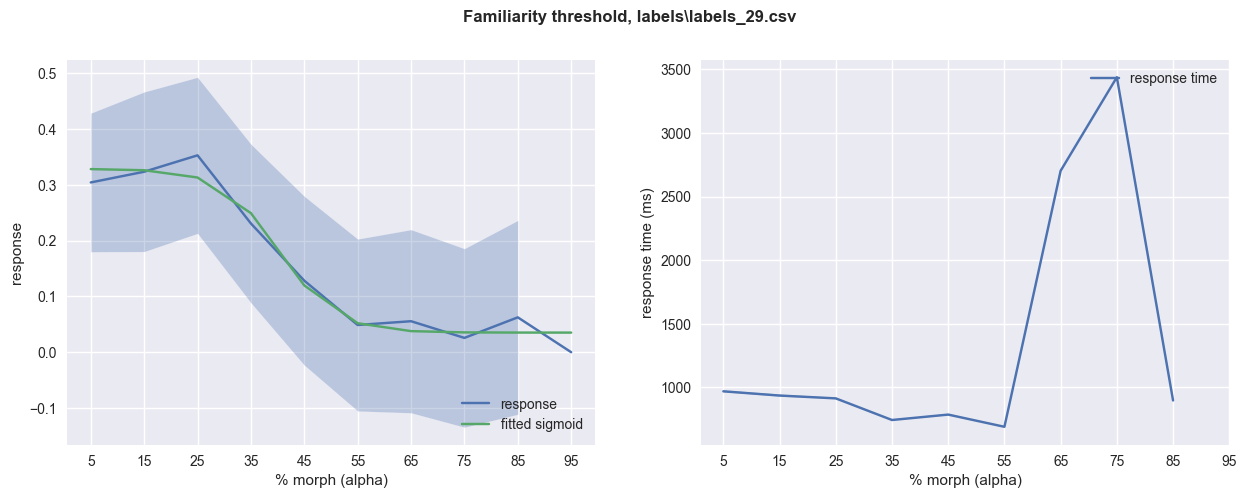

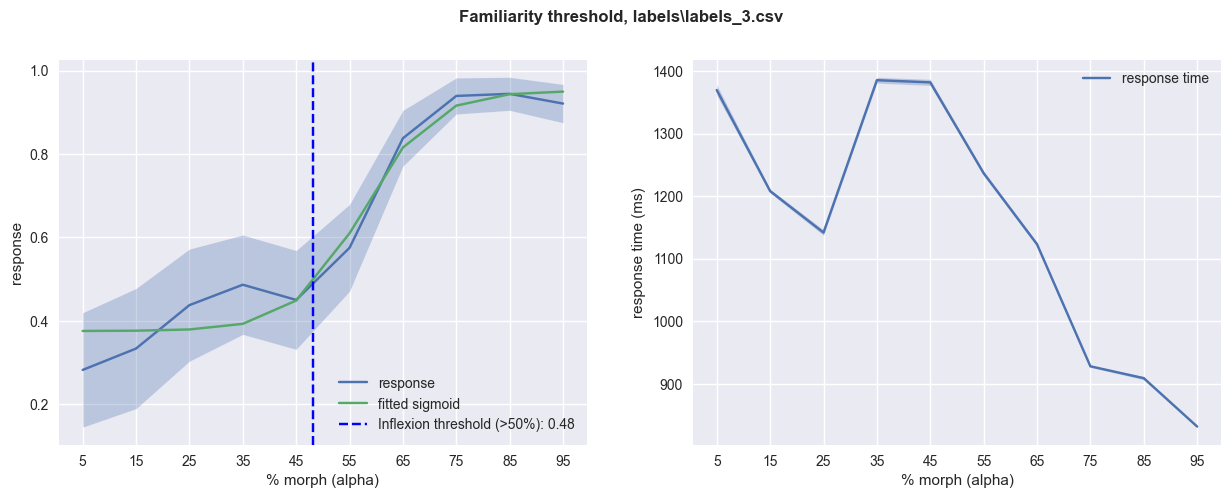

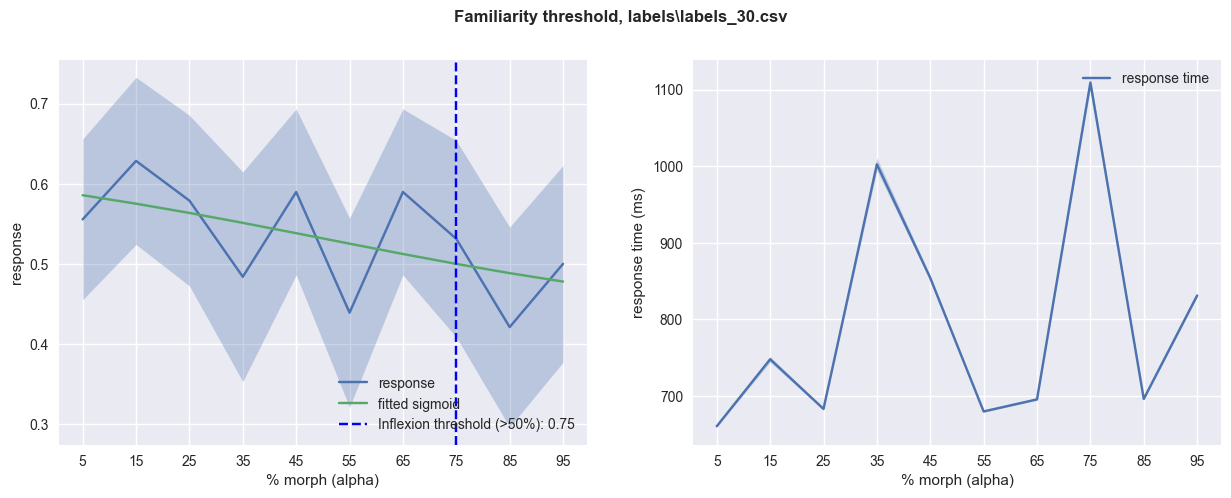

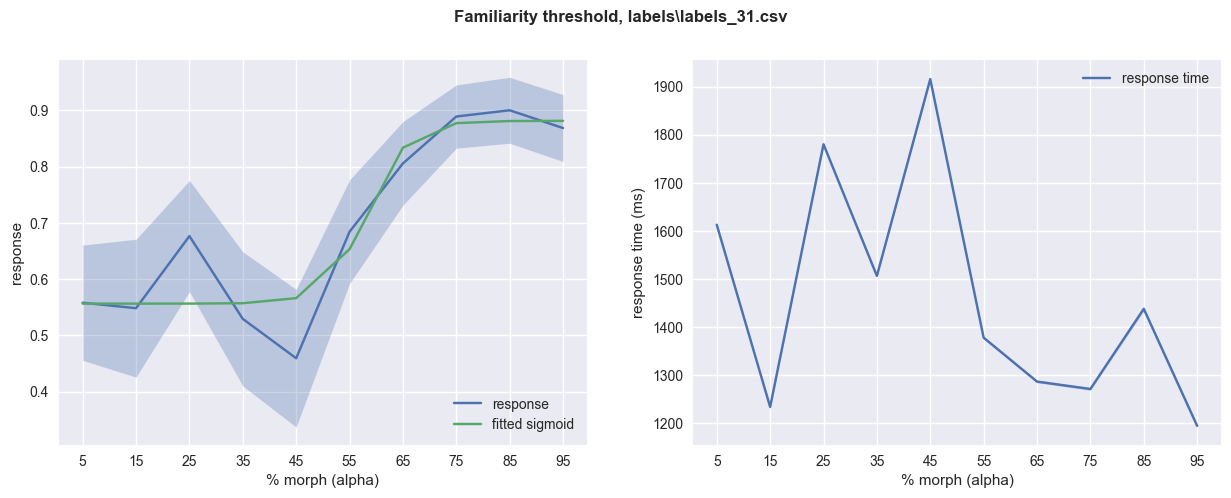

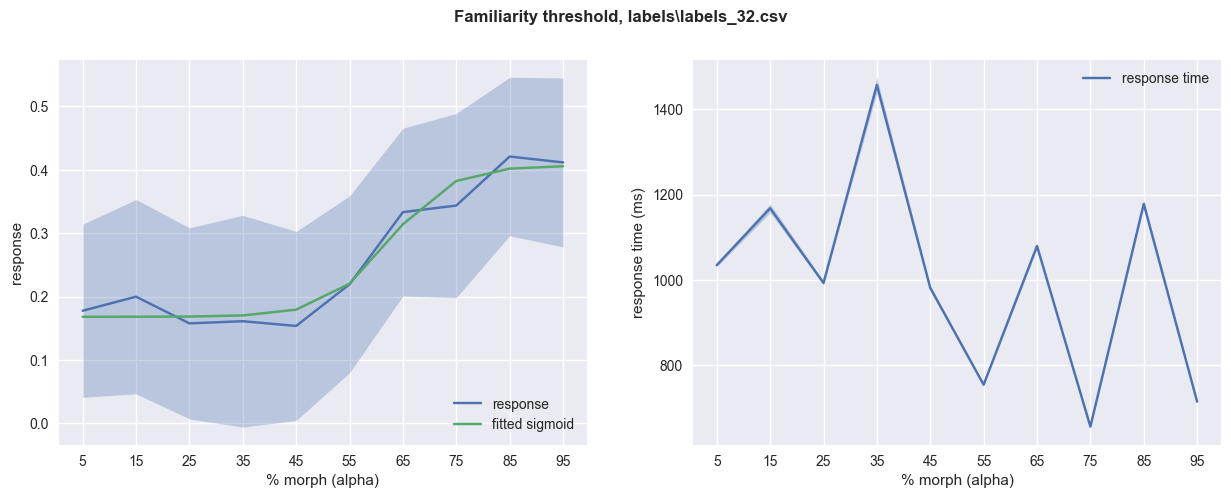

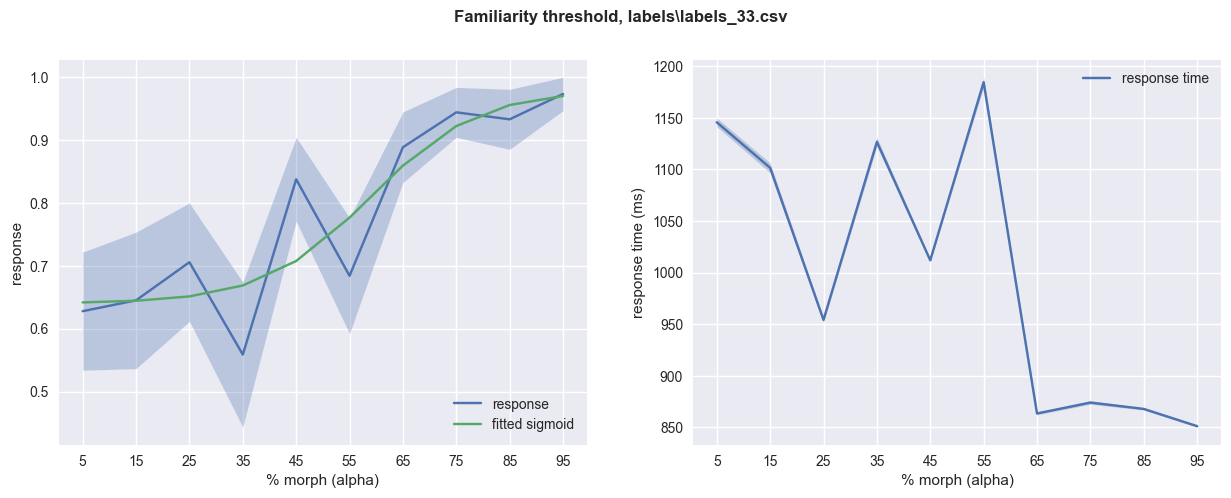

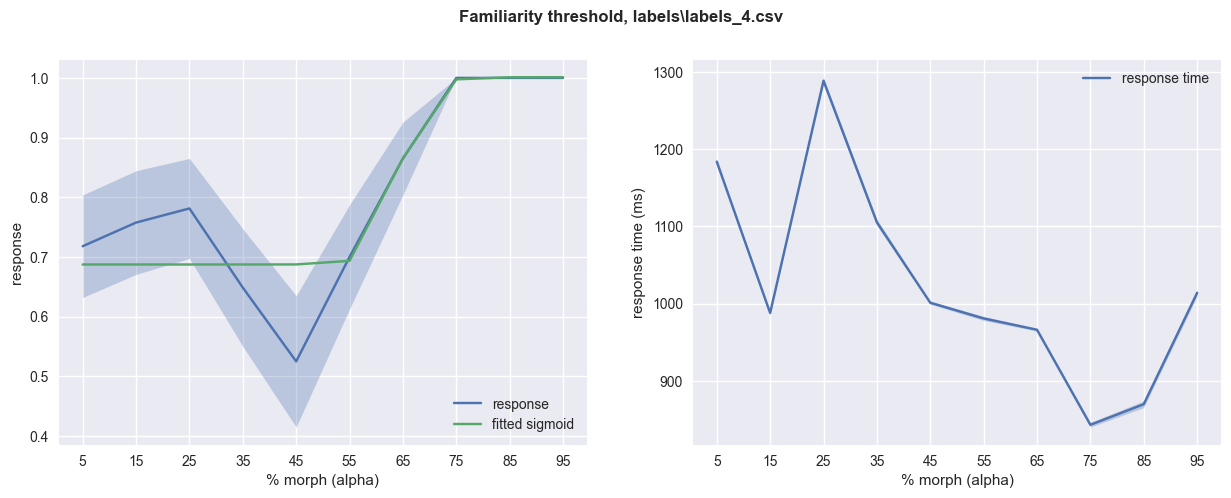

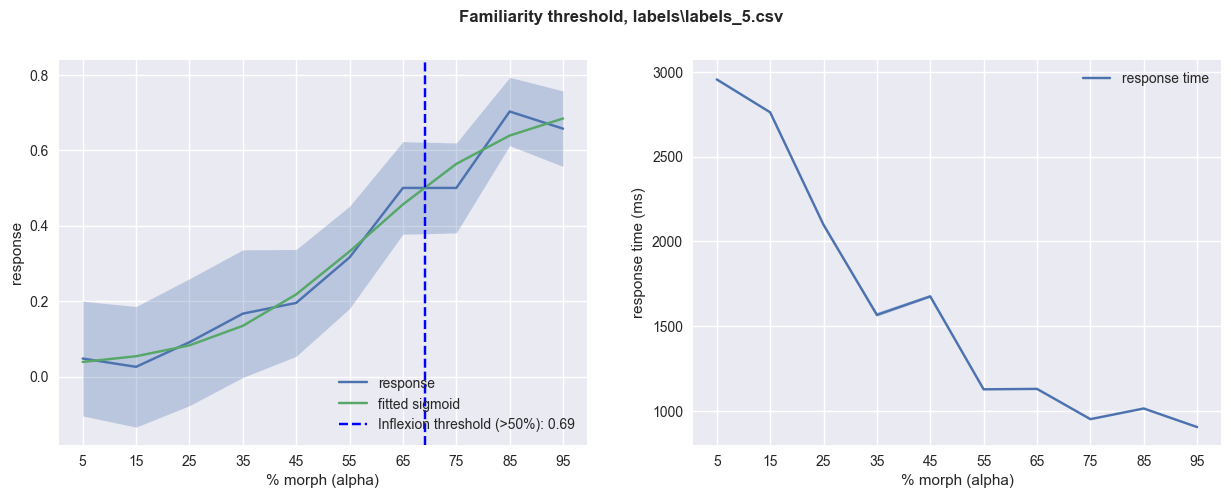

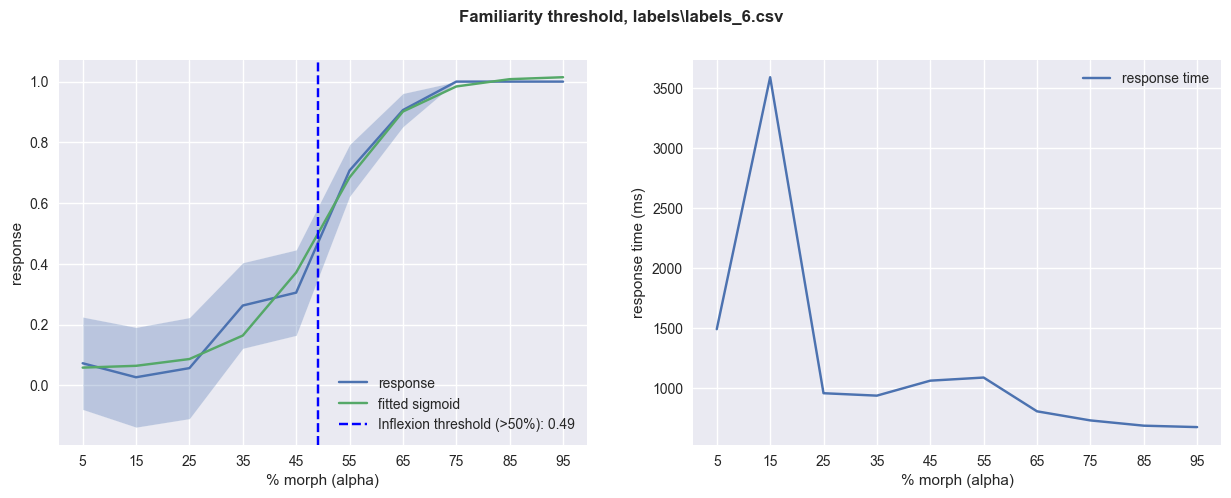

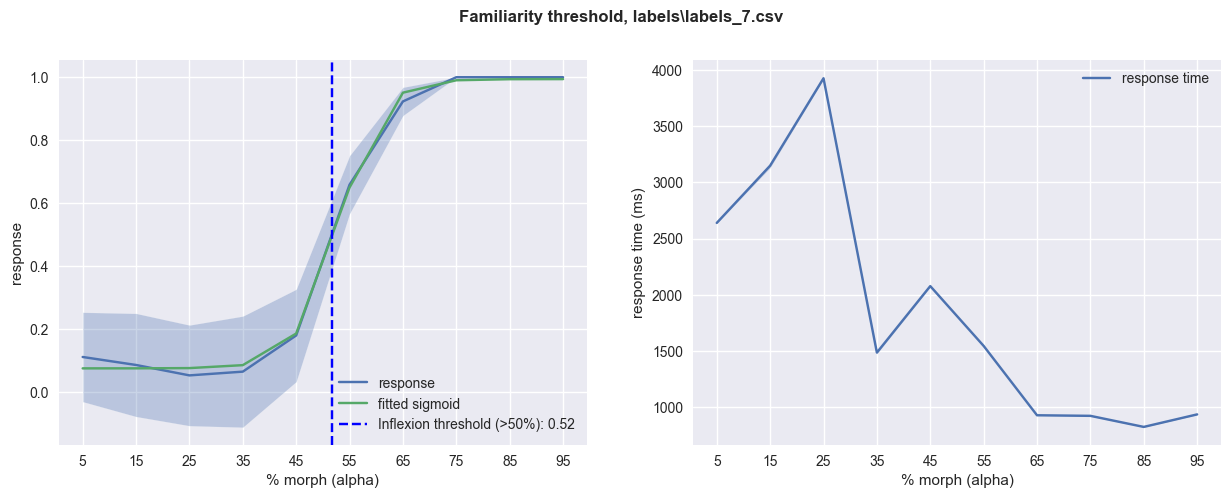

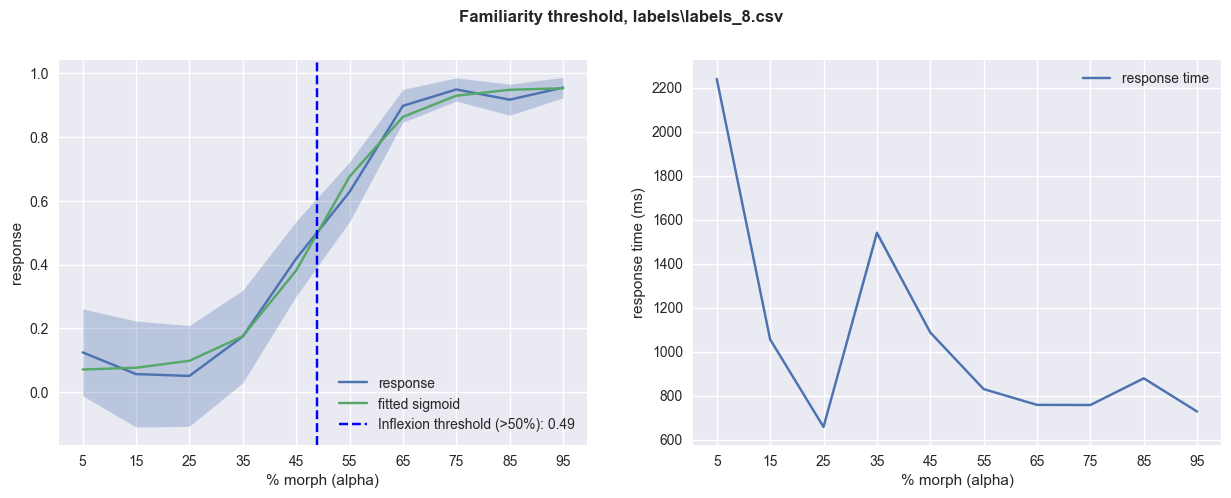

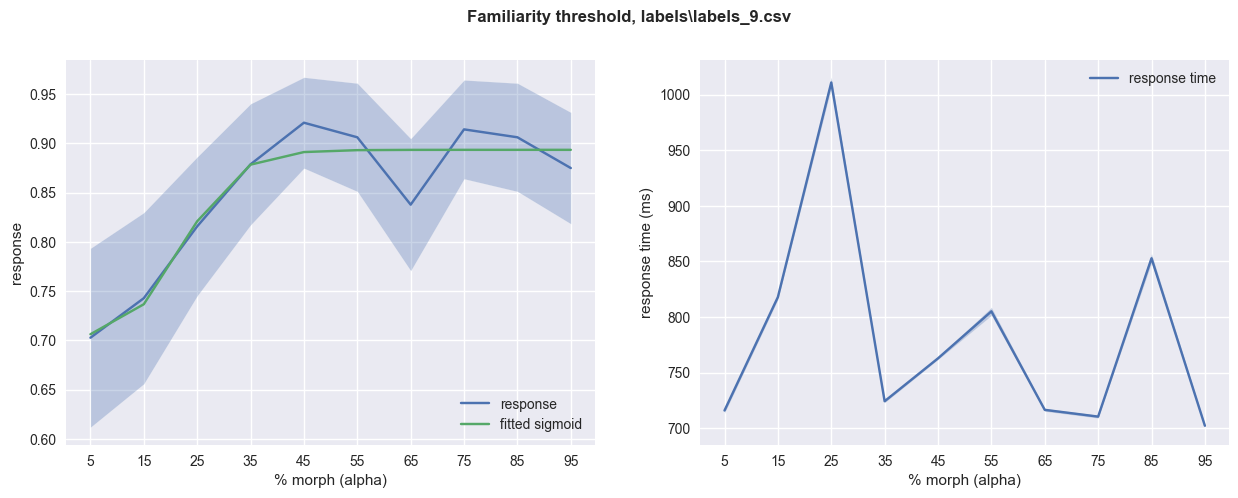

In [6]:
from glob import glob

for label_file in glob("labels/*.csv"):
    df = pd.read_csv(label_file)

    cur_mean, cur_std = compute_morph_scores(df)
    try:
        _, fitted_curve = fit_sigmoid(cur_mean)
        inflexion_point = find_inflexion(fitted_curve)
    except RuntimeError:
        fitted_curve = None
        inflexion_point = None

    plot_behavioral_data(cur_mean, cur_std,
                         sigmoid_curve=fitted_curve,
                         inflexion_point=inflexion_point,
                         title=f"Familiarity threshold, {label_file}")



In [11]:
fitted_curve

array([0.07495822, 0.07502197, 0.07579837, 0.08515777, 0.18560012,
       0.64958326, 0.95093747, 0.99032006, 0.99370872, 0.99398784])

In [24]:

xinterp = np.linspace(0.05, 0.95, 1000)
xvals = np.linspace(0.05, 0.95, 10)
interpolated = np.interp(xinterp, xvals, fitted_curve)

xinterp[np.argwhere(np.diff(interpolated > 0.5))][0, 0]



np.float64(0.5175675675675675)